In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from predrain import *
sz = 256
nt = 10
bs = 6
num_gpus = 1
gpu_start = 1
pred_mode = 'skip'

In [3]:
mt = ModelType.PredNetLeakyRelu

In [4]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, pred_mode, allow_growth=False)

In [5]:
P.get_data(pred_mode=pred_mode, idx=2)

((<tf.Tensor 'IteratorGetNext:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros:0' shape=(6, 1) dtype=float32>),
 (<tf.Tensor 'IteratorGetNext_1:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_1:0' shape=(6, 1) dtype=float32>),
 22500,
 2500)

In [6]:
P.get_model(mt, output_mode='prediction')

In [7]:
P.load(ModelType.PredNetLeakyRelu, 256, pred_mode, 2, by_name=True)

In [8]:
x, y = P.val_tensors
sess = K.get_session()

In [9]:
p = P.model.predict(x, verbose=1, steps=1)

1/1 [==============================] - 5s 5s/step


In [10]:
t = P.denorm(p)

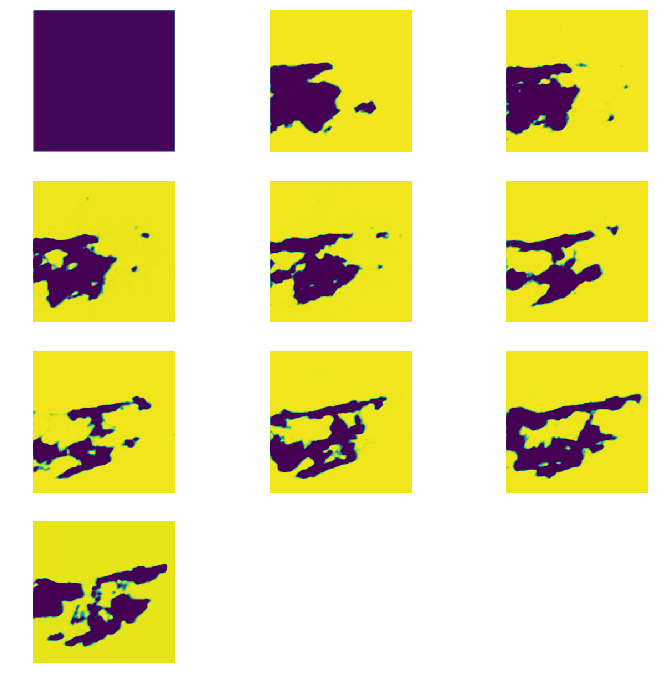

In [11]:
plots(t[0], figsize=(12, 12), rows=4)

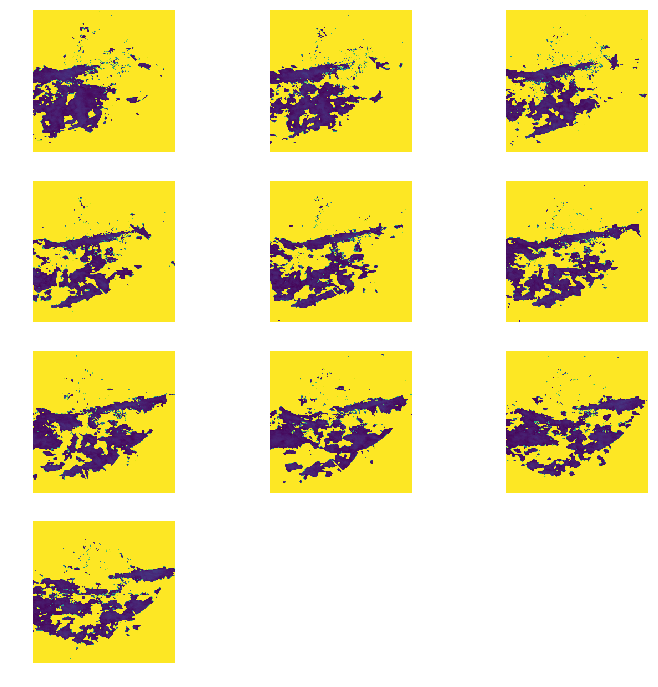

In [13]:
plots(x.eval(session=sess)[0], figsize=(12, 12), rows=4)